## Data Description  of Sample
--> Providing first insights into the data using a sample data set of 50 random article:
- How many articles are there? By how many and which newspapers were they published?
- In which ressorts are the articles published?
- When are articles published?
- How long are the artiles?


### Imports and Paths

In [1]:
# imports
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm 
from datetime import datetime
from ast import literal_eval

In [2]:
from IPython.display import display, HTML
import os
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# change cwd
%cd drive/MyDrive/Work/Frontline/data

/content/drive/.shortcut-targets-by-id/1WfnZsqpG1r110J63sMbfS5TpsDOkveiV/data


In [5]:
# paths
FILTERED_PATH="filtered_4_26"

### Read & Combine Data


In [6]:
df=pd.read_csv("sample.csv")

### Data  and Plots

Wie viele Artikel gibt es über häusliche Gewalt?

In [7]:
print(f"Es gibt {len(df)} Artikel zum Thema häusliche Gewalt, die in {len(df.name.value_counts())} Zeitungen erschienen")

Es gibt 50 Artikel zum Thema häusliche Gewalt, die in 29 Zeitungen erschienen


Wie viele Artikel veröffentlichen Zeitungen über häusliche Gewalt?




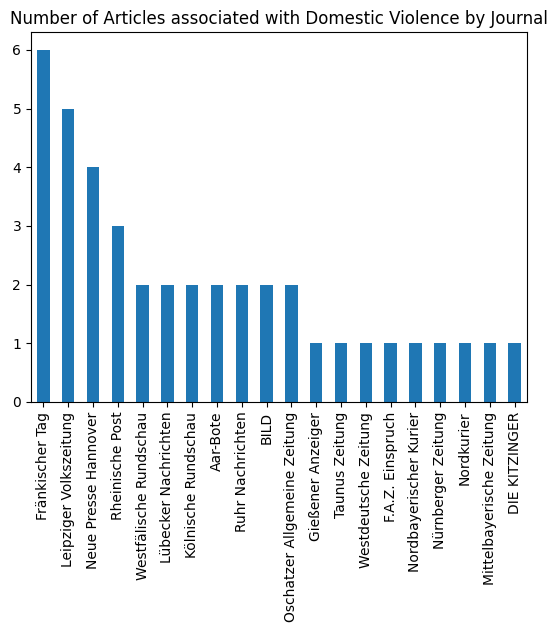

In [8]:
df["name"].value_counts()[:20].plot(kind="bar", title="Number of Articles associated with Domestic Violence by Journal");

In [9]:
df["name"].value_counts() 

Fränkischer Tag                         6
Leipziger Volkszeitung                  5
Neue Presse Hannover                    4
Rheinische Post                         3
Westfälische Rundschau                  2
Lübecker Nachrichten                    2
Kölnische Rundschau                     2
Aar-Bote                                2
Ruhr Nachrichten                        2
BILD                                    2
Oschatzer Allgemeine Zeitung            2
Gießener Anzeiger                       1
Taunus Zeitung                          1
Westdeutsche Zeitung                    1
F.A.Z. Einspruch                        1
Nordbayerischer Kurier                  1
Nürnberger Zeitung                      1
Nordkurier                              1
Mittelbayerische Zeitung                1
DIE KITZINGER                           1
Nürnberger Nachrichten                  1
Neuss-Grevenbroicher Zeitung            1
Meller Kreisblatt                       1
Rhein-Zeitung                     

In welchen Ressorts wird veröffentlicht?


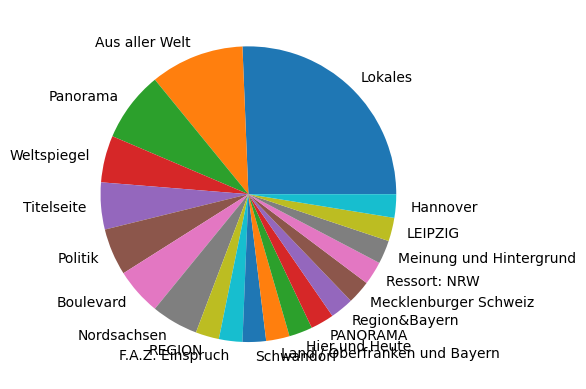

In [10]:
plt.pie(df.ressort.value_counts()[:20],labels =df.ressort.value_counts()[:20].index);

Wann werden Zeitungen veröffentlicht?

In [11]:
## articles without date
df.datum.isna().sum()

0

In [12]:
dates=df[~df.datum.isna()].datum.astype(int)
dates=pd.to_datetime(dates, format="%Y%m%d")

In [13]:
#create a monthy aggregation of the articles
dates_month=[i.to_period("M") for i in dates]
months=[x.to_period("M") for x in pd.date_range(dates.min().date(),dates.max().date(), freq='MS')]
# set the value to 0 for all the remaining months
missing_months=[(x,0) for x in months if x not in dates_month]
dates_month_counter=dict(Counter(dates_month))
dates_month_counter.update(dict(missing_months))

In [14]:
dates_month_counter=pd.DataFrame.from_dict(dates_month_counter, orient="index")[0]

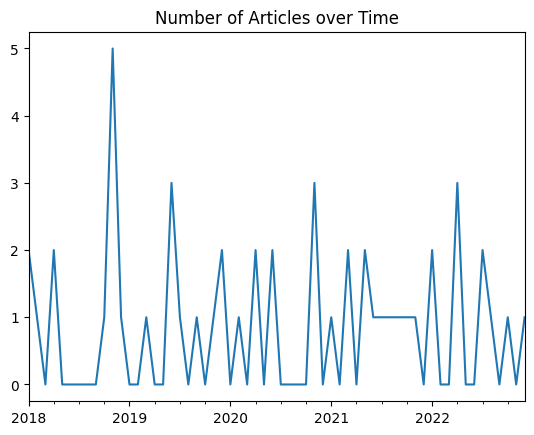

In [15]:
dates_month_counter.sort_index().plot(title="Number of Articles over Time",);

What are the peaks? (95%-quantiles)

In [16]:
dates_month_counter[dates_month_counter>dates_month_counter.quantile(0.95)].sort_index()

2018-11    5
Freq: M, Name: 0, dtype: int64

Länge der Artikel

In [17]:
lengths=[len(("".join(i).split(" "))) for i in df.text]
lengths_rounded=[round(i)for i in lengths]

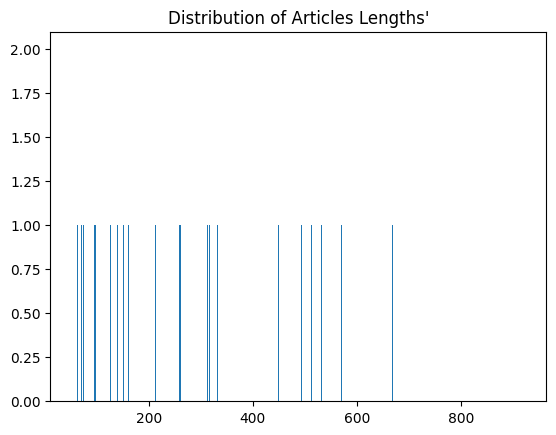

In [18]:
plt.bar(dict(Counter(lengths_rounded)).keys(),dict(Counter(lengths_rounded)).values());
plt.title("Distribution of Articles Lengths'");

Are there outliers?

In [19]:
idx=[i>10000 for i in lengths]
print(f"{df[idx].shape[0]} articles have a length of >10000 words")


0 articles have a length of >10000 words
